In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/freelancer_earnings_bd.csv")  # adjust path as needed

df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df.drop(columns=['freelancer_id'], inplace=True)
df.drop_duplicates(inplace=True)

df['experience_level'] = df['experience_level'].str.strip().str.title()
df['job_category'] = df['job_category'].str.strip().str.title()

df = df[df['earnings_usd'] >= 0]
df = df[df['hourly_rate'] >= 0]


In [3]:
df.to_csv("../data/freelancer_earnings_bd_cleaned.csv", index=False)
print("✅ Cleaned data saved to 'data/freelancer_earnings_bd_cleaned.csv'")


✅ Cleaned data saved to 'data/freelancer_earnings_bd_cleaned.csv'


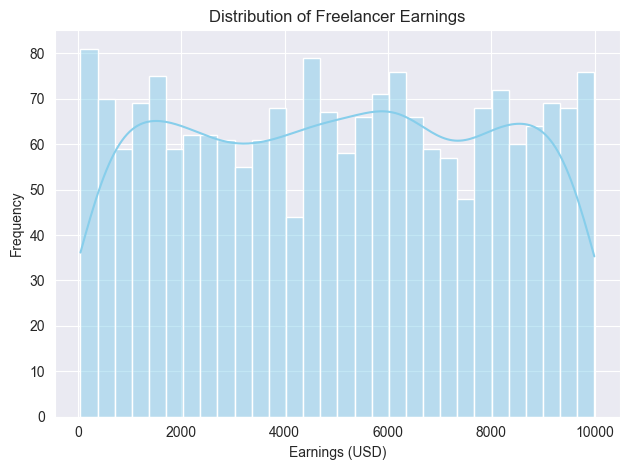

In [4]:
sns.histplot(df['earnings_usd'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Freelancer Earnings")
plt.xlabel("Earnings (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


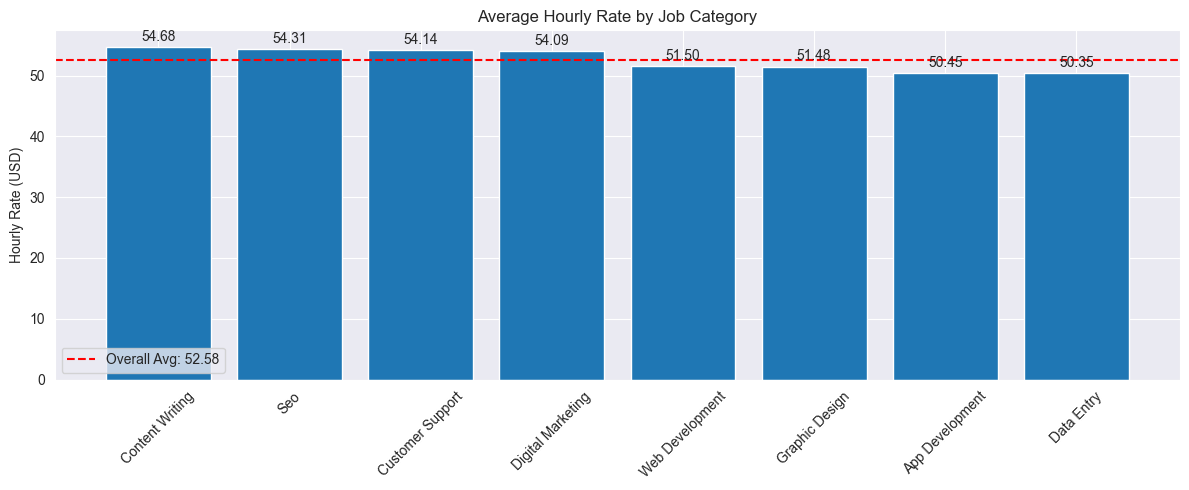

In [5]:
category_rate = df.groupby('job_category')['hourly_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.bar(category_rate.index, category_rate.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

overall_avg = df['hourly_rate'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()

plt.title("Average Hourly Rate by Job Category")
plt.ylabel("Hourly Rate (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


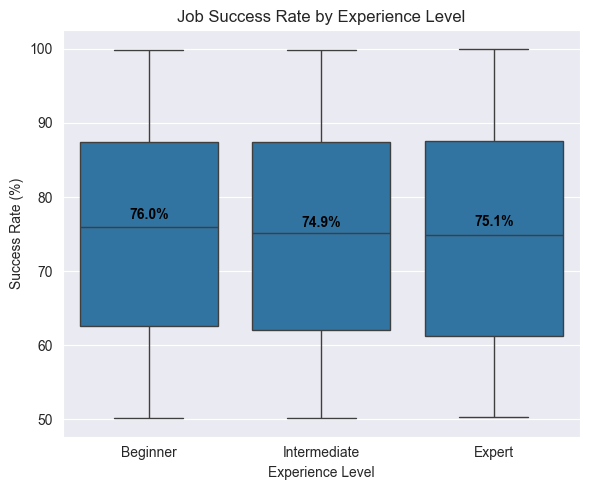

In [6]:
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='experience_level', y='job_success_rate', data=df)
plt.title("Job Success Rate by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Success Rate (%)")

medians = df.groupby('experience_level')['job_success_rate'].median()
positions = range(len(medians))

for pos, (label, median_val) in zip(positions, medians.items()):
    ax.text(pos, median_val + 1, f'{median_val:.1f}%', ha='center', color='black', weight='bold')

plt.tight_layout()
plt.show()


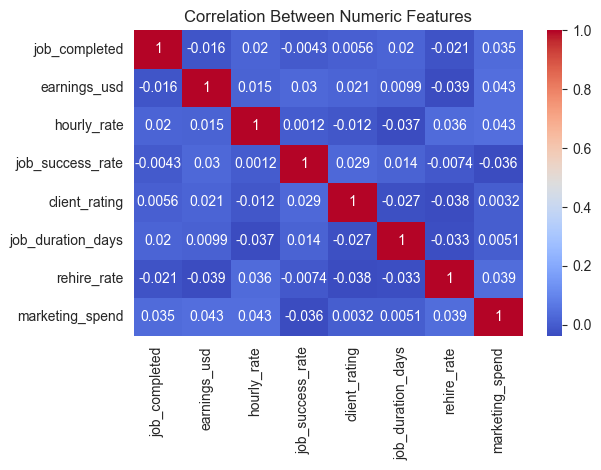

In [7]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()
